# Eksi Sözlük User’s and Daily Topic Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

%matplotlib inline

In [2]:
df = pd.read_csv("/Users/ideakadikoy/Desktop/entries_processed_sentimen_df.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17867 entries, 0 to 17866
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Entry            17867 non-null  object
 1   Author           17867 non-null  object
 2   Date             17867 non-null  object
 3   Old_Topic        17867 non-null  object
 4   New_Topic        17867 non-null  object
 5   Edited           17867 non-null  bool  
 6   Entry_Date       17867 non-null  object
 7   Edit_Date        2691 non-null   object
 8   Processed_Entry  17867 non-null  object
 9   Stemmed_Entry    17863 non-null  object
 10  sentiment        17867 non-null  object
 11  Entry_Length     17867 non-null  int64 
dtypes: bool(1), int64(1), object(10)
memory usage: 1.5+ MB


In [4]:
df.head()

,Entry,Author,Date,Old_Topic,New_Topic,Edited,Entry_Date,Edit_Date,Processed_Entry,Stemmed_Entry,sentiment,Entry_Length
0,"arife gunu yarim gun mesaisini yapmami$, tembe...",ssg,21.02.2002 12:03 ~ 12:03,kadıköy belediyesi,kadıköy belediyesi,True,2002-02-21 12:03:00,2022-09-19 12:03:00,arife gunu yarim gun mesaisini yapmami tembel ...,arif gun yarim gun mesai yapmami tembel beledi...,"{'label': 'negative', 'score': 0.9968181848526...",82
1,"sorumluluklarin %50sini yerine getirse, kadiko...",deadpoem,11.01.2003 16:24,kadıköy belediyesi,kadıköy belediyesi,False,2003-11-01 16:24:00,NaN,sorumluluklarin getirse kadikoy sevecen anabil...,sorumluluklari getir kadikoy sevecen anabilece...,"{'label': 'positive', 'score': 0.9342314600944...",85
2,sağa sola kent yaşamının gerçek sahibi yayalar...,melancholyman,01.02.2003 02:10 ~ 02:12,kadıköy belediyesi,kadıköy belediyesi,True,2003-01-02 02:10:00,2022-09-19 02:12:00,sağa sola kent yaşamının gerçek sahibi yayalar...,sak sol kent yaşam gerçek sahip yaya yazan baş...,"{'label': 'negative', 'score': 0.960749089717865}",101
3,(bkz: kadikoy afet kriz merkezi),mercan,21.03.2003 18:46,kadıköy belediyesi,kadıköy belediyesi,False,2003-03-21 18:46:00,NaN,kadikoy afet kriz merkezi,kadikoy afet kriz merkez,"{'label': 'positive', 'score': 0.9187794327735...",25
4,internet sitesinde sahipsiz kedi ve köpekler i...,sai baba,03.08.2004 00:17,kadıköy belediyesi,kadıköy belediyesi,False,2004-03-08 00:17:00,NaN,internet sitesinde sahipsiz kedi köpekler bölü...,internet site sahips ked köpek böl isteyen hay...,"{'label': 'negative', 'score': 0.8820550441741...",116


In [5]:
df.Author.describe()

count     17867
unique    11007
top        oric
freq         84
Name: Author, dtype: object

In [6]:
df.Author.unique()

array(['ssg', 'deadpoem', 'melancholyman', ..., 'hayfan', 'novazera',
       'cumhurreisi'], dtype=object)

In [7]:
df.Author.index

RangeIndex(start=0, stop=17867, step=1)

In [8]:
df["Author"].value_counts()[df["Author"].value_counts() >= 10].index

Index(['oric', 'mukatta', 'ikitam1bolu2', 'uzunada1969',
       'kelebeklerinviziltisi', 'utanan ayi', 'piknik tupu', 'le fougueux',
       'zaman sokaklarda kayboluyordu', 'masseur', 'fukka', 'melyus',
       'bubez laab', 'eeuummm', 'scener', 'lahmacun kafa', 'elmasalyangozu',
       'kerevizyon', 'isp', 'earthseawizard', 'mr fusion', 'aksi seytan',
       '29 ekim 1923', 'yargin', 'melancholyman', 'ayrikotu', 'dogville',
       'protospher', 'raki masasinin degismez adami',
       'dirsektemasaraligihizayagec', 'zelyot',
       'bir gun belki yani neden olmasin', 'bb krem', 'neceflimasrapa',
       'indis', 'fenasi kerim', 'therepulsion', 'tangocharliejuliett',
       'huzur izlanda', 'motwotf', 'webya', 'thorin', 'bozdoganli',
       'blockrockin beatnik', 'isaacls', 'whatdreamsnevercome',
       'birbenmiyimakilli', 'dolphins were monkeys', 'arrethius',
       'ismin e hali', 'winsome', 'metal revolution', 'fortuneteller 657',
       'arachnid', 'whatyougetiswhatyoudid', 'destroy 

In [9]:
df[df["Author"].isin(df["Author"].value_counts()[df["Author"].value_counts() >= 10].index)]

#merge dataframe iki data frame birlestirebiliyorsun


,Entry,Author,Date,Old_Topic,New_Topic,Edited,Entry_Date,Edit_Date,Processed_Entry,Stemmed_Entry,sentiment,Entry_Length
0,"arife gunu yarim gun mesaisini yapmami$, tembe...",ssg,21.02.2002 12:03 ~ 12:03,kadıköy belediyesi,kadıköy belediyesi,True,2002-02-21 12:03:00,2022-09-19 12:03:00,arife gunu yarim gun mesaisini yapmami tembel ...,arif gun yarim gun mesai yapmami tembel beledi...,"{'label': 'negative', 'score': 0.9968181848526...",82
2,sağa sola kent yaşamının gerçek sahibi yayalar...,melancholyman,01.02.2003 02:10 ~ 02:12,kadıköy belediyesi,kadıköy belediyesi,True,2003-01-02 02:10:00,2022-09-19 02:12:00,sağa sola kent yaşamının gerçek sahibi yayalar...,sak sol kent yaşam gerçek sahip yaya yazan baş...,"{'label': 'negative', 'score': 0.960749089717865}",101
7,aydın görüntüsü vermeye çalışan taşra zihniyet...,masseur,07.09.2005 09:30,kadıköy belediyesi,kadıköy belediyesi,False,2005-07-09 09:30:00,NaN,aydın görüntüsü vermeye çalışan taşra zihniyet...,ayt görüntü verme çalışan taşr zihniyet beledi...,"{'label': 'negative', 'score': 0.9994091987609...",388
47,"arkadaslar, yarin 17:00'den itibaren van'a gid...",darknum,25.10.2011 23:15,kadıköy belediyesi,kadıköy belediyesi,False,2011-10-25 23:15:00,NaN,arkadaslar yarin van gidecek yardimlarin hazir...,arkadas yari van gidecek yardimlari hazirlanma...,"{'label': 'negative', 'score': 0.9980090260505...",284
48,organizasyonu canavar gibi yapmış belediye. ha...,darknum,27.10.2011 01:41,kadıköy belediyesi,kadıköy belediyesi,False,2011-10-27 01:41:00,NaN,organizasyonu canavar yapmış belediye rica ett...,organizasyon canavar yap beledi rica müsait at...,"{'label': 'negative', 'score': 0.9981365203857...",381
...,...,...,...,...,...,...,...,...,...,...,...,...
17834,ne zaman hangi saat gitsem oradadır. bir gün h...,uzunada1969,19.06.2017 21:58,kozyatağı starbucks'da yaşayan gizemli amca,kozyatağı starbucks'da yaşayan gizemli amca,False,2017-06-19 21:58:00,NaN,saat gitsem oradadır gün hard disklerimi götür...,saat git ora gün hard disk götürüp film belges...,"{'label': 'positive', 'score': 0.9393517971038...",104
17842,eski sakinleri tarafından hala yelkenli değirm...,lahmacun kafa,17.03.2015 12:34,kozyatağı atatürk caddesi,kozyatağı atatürk caddesi,False,2015-03-17 12:34:00,NaN,eski sakinleri yelkenli değirmen sokak bilinen...,esk sakin yelken değirmen sokak bilinen cadde,"{'label': 'negative', 'score': 0.9392749071121...",52
17843,hafta itibarıyla açılışı gerçekleşecek olan ed...,uzunada1969,11.06.2014 13:25,kozyatağı edward's coffee,kozyatağı edward's coffee,False,2014-11-06 13:25:00,NaN,hafta açılışı gerçekleşecek edward coffee kozy...,haf açılış gerçekleşecek edward coffe kozyatak...,"{'label': 'negative', 'score': 0.9320157766342...",355
17847,görgüsüz arap müşterileriyle meşhur byotell'in...,uzunada1969,16.08.2017 22:29,kozyatağı edward's coffee,kozyatağı edward's coffee,False,2017-08-16 22:29:00,NaN,görgüsüz arap müşterileriyle meşhur byotell gi...,görgüs arap müşteri meşhur byotell giriş katı ...,"{'label': 'negative', 'score': 0.9995079040527...",226


In [10]:
df["New_Topic"].nunique()

301

In [11]:
df["Entry_Date"] = pd.to_datetime(df["Entry_Date"])

df["Entry_Date"].dt.date

df["date"]=df["Entry_Date"].dt.date

import datetime
df["Entry_Date"] = df["date"].transform(lambda x: datetime.datetime.strftime(x, "%Y-%m-%d"))

df.groupby(["Entry_Date"])["Entry"].count()

pd.DataFrame(df.groupby(["Entry_Date"])["Entry"].count()).reset_index()

,Entry_Date,Entry
0,1999-03-28,1
1,1999-03-29,1
2,1999-06-27,1
3,1999-08-07,3
4,1999-08-10,1
...,...,...
3369,2022-12-05,2
3370,2022-12-06,1
3371,2022-12-07,1
3372,2022-12-08,4


In [12]:
pd.DataFrame(df.groupby(["New_Topic", "date"])["Entry"].count()).reset_index()

,New_Topic,date,Entry
0,1 nisan 2021 kadıköy polis şiddeti,2021-01-04,36
1,1 nisan 2021 kadıköy polis şiddeti,2021-02-04,25
2,1 nisan 2021 kadıköy polis şiddeti,2021-03-04,2
3,10 aralık 2016 acıbadem'de duyulan patlama,2016-10-12,16
4,10 aralık 2016 acıbadem'de duyulan patlama,2016-11-12,1
...,...,...,...
5008,şanlı erenköy direnişi,2019-05-01,1
5009,şanlı erenköy direnişi,2019-08-24,1
5010,şanlı erenköy direnişi,2020-05-25,1
5011,şanlı erenköy direnişi,2020-09-08,1


In [25]:
df["New_Topic"].value_counts()[df["New_Topic"].value_counts() > 300].index

Index(['kadıköy sokaklarında amaçsızca tek başına dolanmak',
       '23 şubat 2020 kadıköy belediyesi paylaşımı', 'caddebostan sahili',
       'moda', 'caddebostan sahilini suriyelilerin istila etmesi',
       'haydarpaşa garı', 'kadıköy ve şişli türkiye'nin kaymağını yiyor',
       'kadıköy belediyesi', 'kozyatağı metrosu'ndaki silahlı adamlar',
       'kadıköy bel.'nin göz kamaştıran kaldırım tamiri'],
      dtype='object')

In [26]:
df_filtered = df[df["New_Topic"].isin(df["New_Topic"].value_counts()[df["New_Topic"].value_counts() > 300].index)].reset_index(drop=True)

In [27]:
df_filtered_entry_counts = pd.DataFrame(df_filtered.groupby(["New_Topic", "date"])["Entry"].count()).reset_index()

In [28]:
df_filtered_entry_counts

,New_Topic,date,Entry
0,23 şubat 2020 kadıköy belediyesi paylaşımı,2020-02-23,612
1,23 şubat 2020 kadıköy belediyesi paylaşımı,2020-02-24,15
2,23 şubat 2020 kadıköy belediyesi paylaşımı,2020-02-25,3
3,caddebostan sahili,2001-11-27,2
4,caddebostan sahili,2001-12-27,1
...,...,...,...
1496,moda,2022-06-28,1
1497,moda,2022-08-06,1
1498,moda,2022-08-25,1
1499,moda,2022-11-08,3


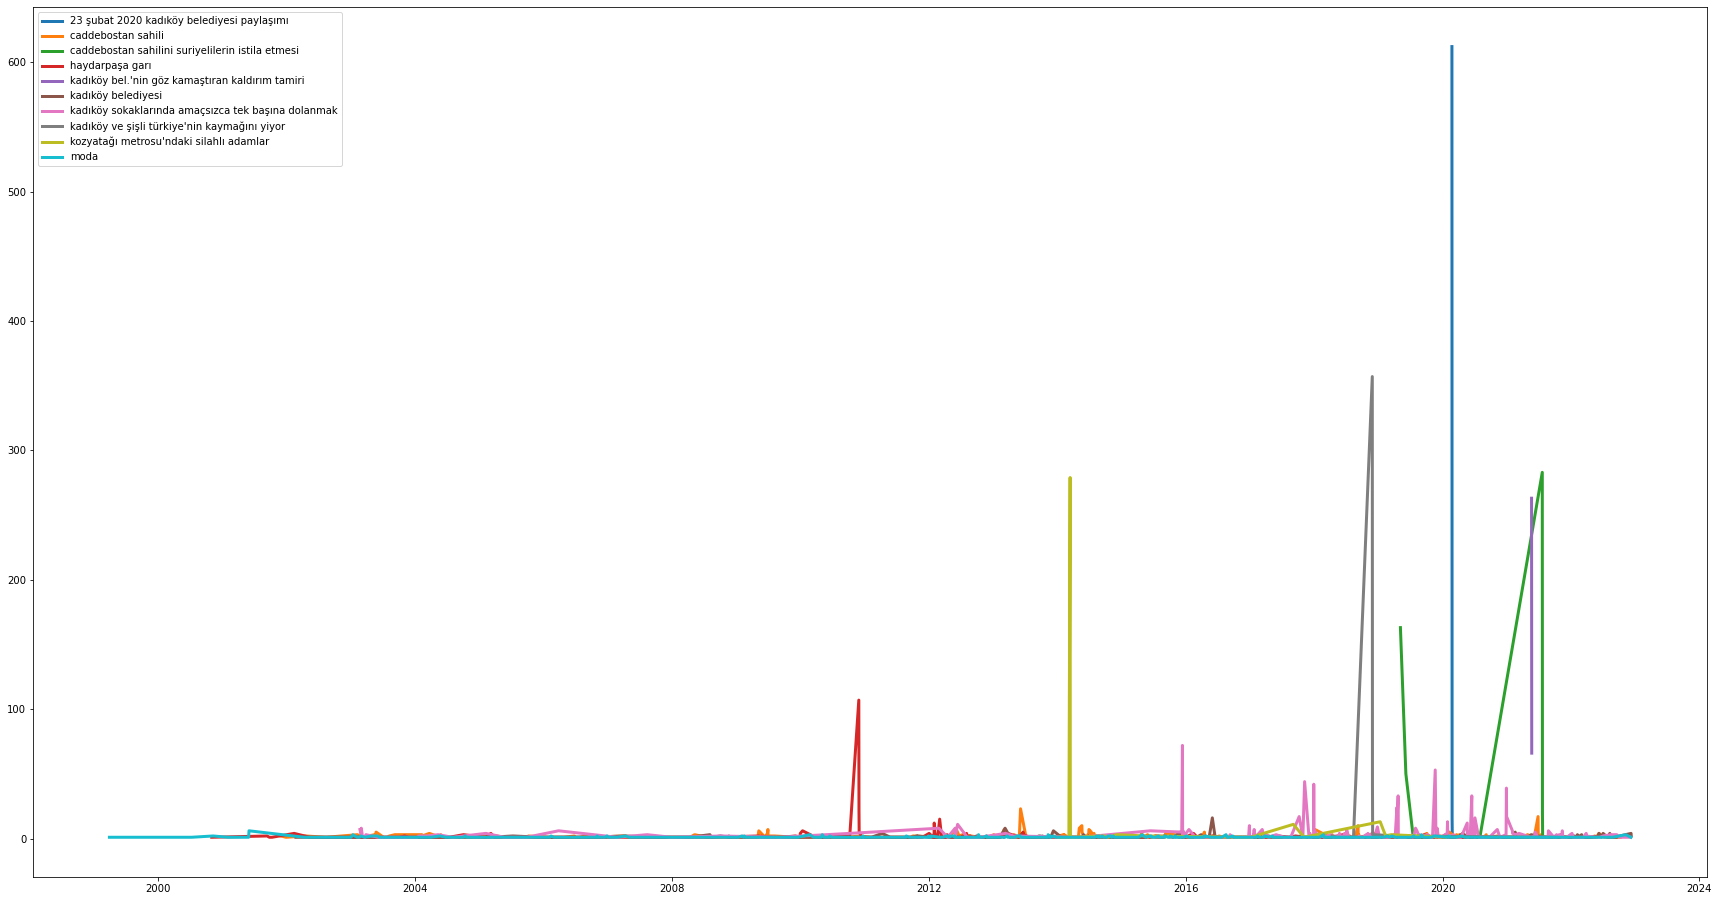

In [29]:
plt.figure(figsize=(30,16))
for topic in sorted(list(df_filtered["New_Topic"].unique())):
    df_ =df_filtered_entry_counts[df_filtered_entry_counts["New_Topic"] == topic]
    plt.plot(df_["date"], df_["Entry"], label=topic,linewidth=3)
plt.legend()
plt.show()

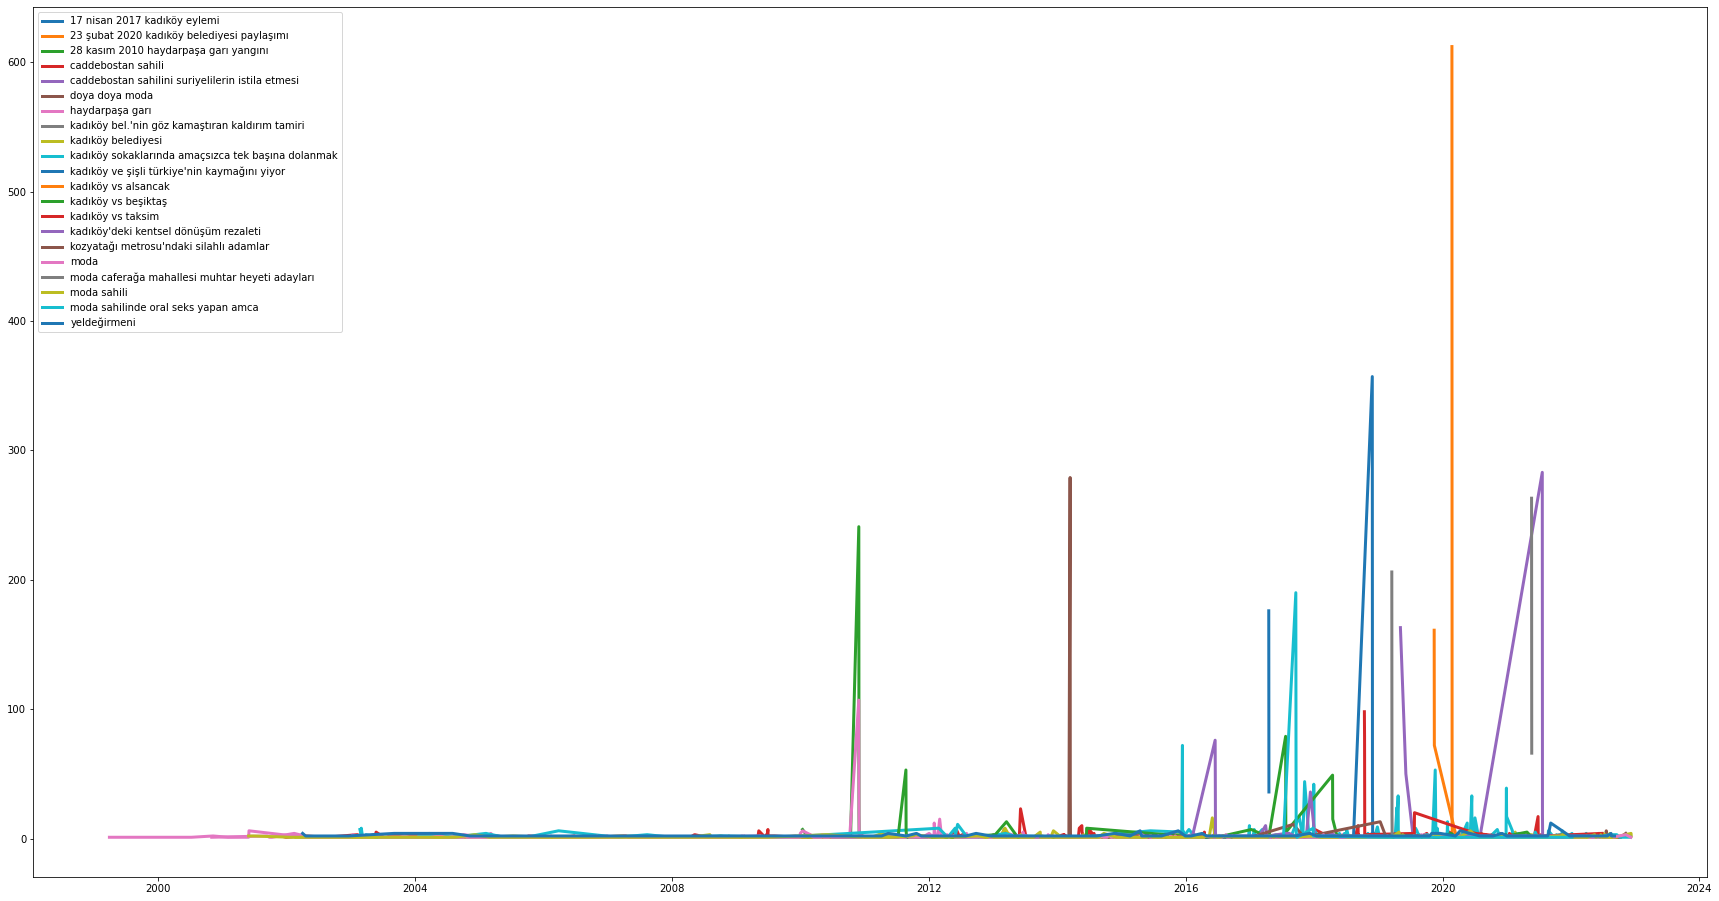

In [24]:
plt.figure(figsize=(30,16))
for topic in sorted(list(df_filtered["New_Topic"].unique())):
    df_ =df_filtered_entry_counts[df_filtered_entry_counts["New_Topic"] == topic]
    plt.plot(df_["date"], df_["Entry"], label=topic,linewidth=3)
plt.legend()
plt.show()

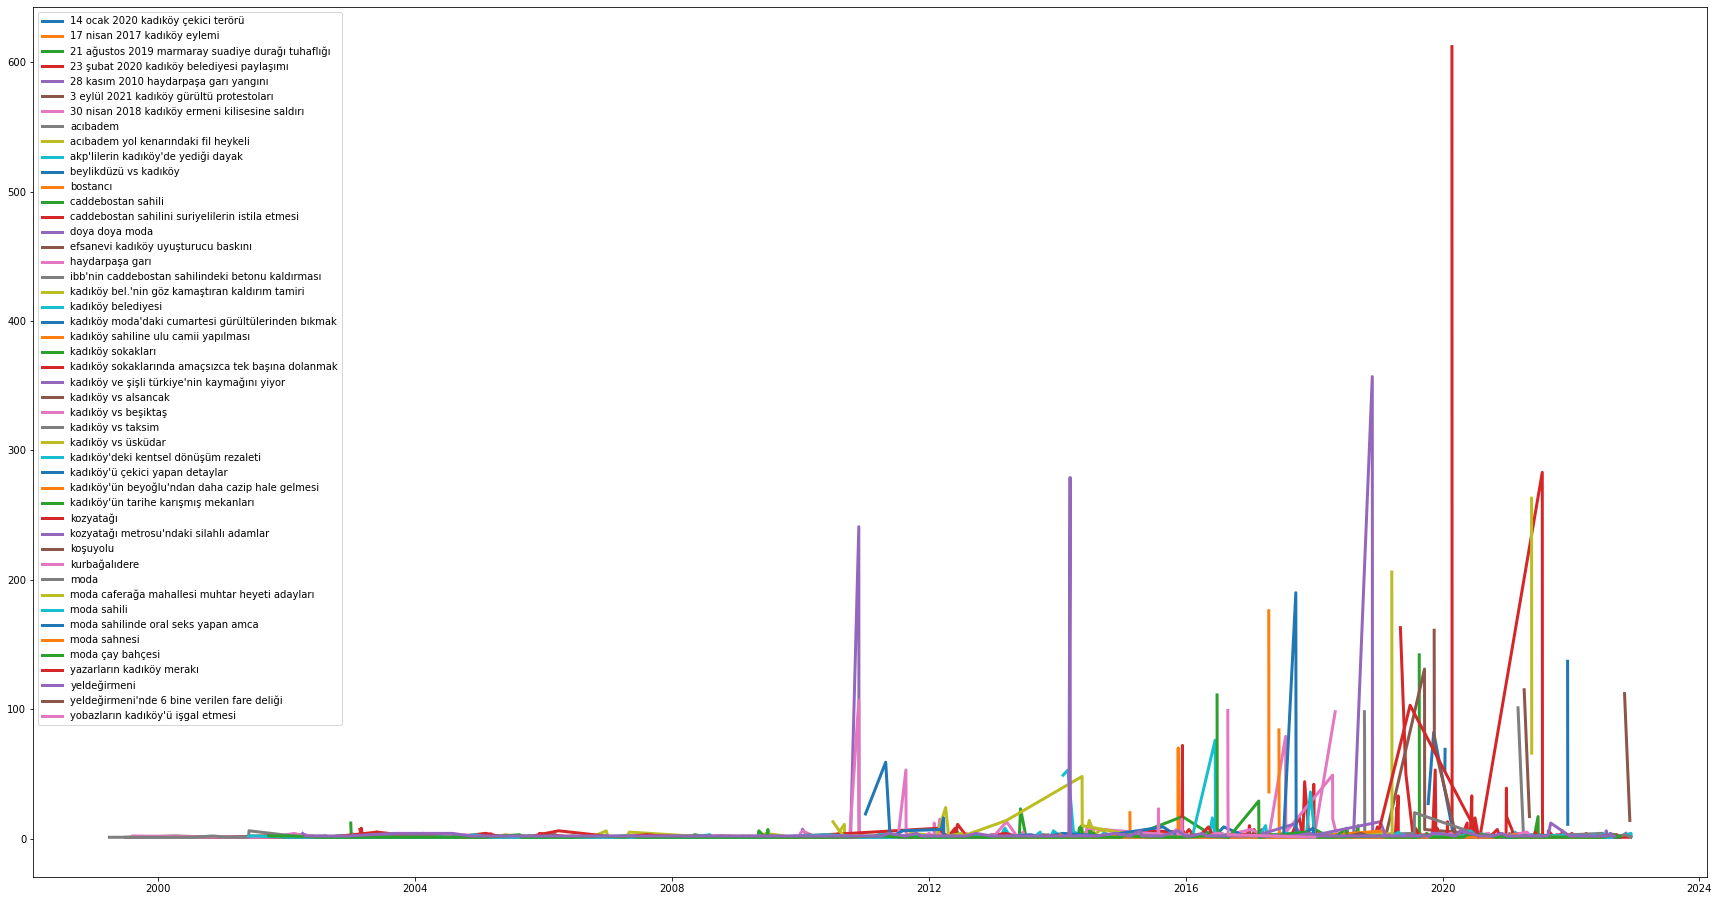

In [18]:
plt.figure(figsize=(30,16))
for topic in sorted(list(df_filtered["New_Topic"].unique())):
    df_ =df_filtered_entry_counts[df_filtered_entry_counts["New_Topic"] == topic]
    plt.plot(df_["date"], df_["Entry"], label=topic,linewidth=3)
plt.legend()
plt.show()

# Time Series Analysis

In [18]:
# import packages

import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17867 entries, 0 to 17866
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Entry            17867 non-null  object
 1   Author           17867 non-null  object
 2   Date             17867 non-null  object
 3   Old_Topic        17867 non-null  object
 4   New_Topic        17867 non-null  object
 5   Edited           17867 non-null  bool  
 6   Entry_Date       17867 non-null  object
 7   Edit_Date        2691 non-null   object
 8   Processed_Entry  17867 non-null  object
 9   Stemmed_Entry    17863 non-null  object
 10  sentiment        17867 non-null  object
 11  Entry_Length     17867 non-null  int64 
 12  date             17867 non-null  object
dtypes: bool(1), int64(1), object(11)
memory usage: 1.7+ MB


In [20]:
df.dtypes


Entry              object
Author             object
Date               object
Old_Topic          object
New_Topic          object
Edited               bool
Entry_Date         object
Edit_Date          object
Processed_Entry    object
Stemmed_Entry      object
sentiment          object
Entry_Length        int64
date               object
dtype: object

In [21]:
df.set_index('date', inplace=True)

df.index

Index([2002-02-21, 2003-11-01, 2003-01-02, 2003-03-21, 2004-03-08, 2004-07-09,
       2005-03-03, 2005-07-09, 2005-07-09, 2005-12-24,
       ...
       2014-09-02, 2015-10-16, 2016-02-07, 2016-05-08, 2017-04-24, 2022-02-07,
       2022-02-07, 2022-02-07, 2022-03-07, 2022-03-07],
      dtype='object', name='date', length=17867)

# User Sentiment Analysis

In [23]:
df.head()

,Entry,Author,Date,Old_Topic,New_Topic,Edited,Entry_Date,Edit_Date,Processed_Entry,Stemmed_Entry,sentiment,Entry_Length
date,,,,,,,,,,,,
2002-02-21,"arife gunu yarim gun mesaisini yapmami$, tembe...",ssg,21.02.2002 12:03 ~ 12:03,kadıköy belediyesi,kadıköy belediyesi,True,2002-02-21,2022-09-19 12:03:00,arife gunu yarim gun mesaisini yapmami tembel ...,arif gun yarim gun mesai yapmami tembel beledi...,"{'label': 'negative', 'score': 0.9968181848526...",82
2003-11-01,"sorumluluklarin %50sini yerine getirse, kadiko...",deadpoem,11.01.2003 16:24,kadıköy belediyesi,kadıköy belediyesi,False,2003-11-01,NaN,sorumluluklarin getirse kadikoy sevecen anabil...,sorumluluklari getir kadikoy sevecen anabilece...,"{'label': 'positive', 'score': 0.9342314600944...",85
2003-01-02,sağa sola kent yaşamının gerçek sahibi yayalar...,melancholyman,01.02.2003 02:10 ~ 02:12,kadıköy belediyesi,kadıköy belediyesi,True,2003-01-02,2022-09-19 02:12:00,sağa sola kent yaşamının gerçek sahibi yayalar...,sak sol kent yaşam gerçek sahip yaya yazan baş...,"{'label': 'negative', 'score': 0.960749089717865}",101
2003-03-21,(bkz: kadikoy afet kriz merkezi),mercan,21.03.2003 18:46,kadıköy belediyesi,kadıköy belediyesi,False,2003-03-21,NaN,kadikoy afet kriz merkezi,kadikoy afet kriz merkez,"{'label': 'positive', 'score': 0.9187794327735...",25
2004-03-08,internet sitesinde sahipsiz kedi ve köpekler i...,sai baba,03.08.2004 00:17,kadıköy belediyesi,kadıköy belediyesi,False,2004-03-08,NaN,internet sitesinde sahipsiz kedi köpekler bölü...,internet site sahips ked köpek böl isteyen hay...,"{'label': 'negative', 'score': 0.8820550441741...",116


In [24]:
df["Sentiment_Label"] = df["sentiment"].apply(lambda x: x.split("'")[3])
df["Sentiment_Score"] = df["sentiment"].apply(lambda x: x.split("'")[6].lstrip(": ").rstrip("}")).astype(float)

In [25]:
pd.DataFrame(df.groupby("Author")["Sentiment_Label"].value_counts()).rename({"Sentiment_Label":"Count"},axis=1).reset_index()

,Author,Sentiment_Label,Count
0,0 5 ucu olan adam,negative,1
1,0 5 ucu olan adam,positive,1
2,00003,negative,1
3,000cs000,positive,3
4,000cs000,negative,1
...,...,...,...
12329,zwich,negative,1
12330,zyva,negative,1
12331,zzeki,negative,1
12332,zzgx,negative,8


In [26]:
dfsentiment = pd.DataFrame(df.groupby("Author")["Sentiment_Label"].value_counts()).rename({"Sentiment_Label":"Count"},axis=1).reset_index()

In [111]:
dfsentiment[dfsentiment["Count"] >= 12].sort_values("Count",ascending=False)

,Author,Sentiment_Label,Count
8387,oric,negative,59
5157,ikitam1bolu2,negative,39
7568,mukatta,negative,35
7569,mukatta,positive,31
11421,utanan ayi,negative,31
6000,kelebeklerinviziltisi,negative,31
11476,uzunada1969,negative,30
8388,oric,positive,25
8806,piknik tupu,negative,20
6543,le fougueux,negative,18


In [28]:
dfsentiment[dfsentiment["Sentiment_Label"] == "negative"].sort_values("Count",ascending=False)
dfsentiment[dfsentiment["Count"] >= 10].sort_values("Count",ascending=False)

,Author,Sentiment_Label,Count
8387,oric,negative,59
5157,ikitam1bolu2,negative,39
7568,mukatta,negative,35
7569,mukatta,positive,31
11421,utanan ayi,negative,31
6000,kelebeklerinviziltisi,negative,31
11476,uzunada1969,negative,30
8388,oric,positive,25
8806,piknik tupu,negative,20
6543,le fougueux,negative,18


In [105]:
dfsentiment[dfsentiment["Sentiment_Label"] == "positive"].sort_values("Count",ascending=False)
dfsentiment[dfsentiment["Count"] >= 20].sort_values("Count",ascending=False)

,Author,Sentiment_Label,Count
8387,oric,negative,59
5157,ikitam1bolu2,negative,39
7568,mukatta,negative,35
6000,kelebeklerinviziltisi,negative,31
7569,mukatta,positive,31
11421,utanan ayi,negative,31
11476,uzunada1969,negative,30
8388,oric,positive,25
8806,piknik tupu,negative,20


In [30]:
dfsentiment[(dfsentiment["Sentiment_Label"] == "positive") & (dfsentiment["Count"] >= 10)].sort_values("Count",ascending=False)

,Author,Sentiment_Label,Count
7569,mukatta,positive,31
8388,oric,positive,25
5249,indis,positive,11
12189,zaman sokaklarda kayboluyordu,positive,11
7186,melyus,positive,10
11477,uzunada1969,positive,10
11927,yargin,positive,10


In [39]:
dfsentiment_pos = dfsentiment[(dfsentiment["Sentiment_Label"] == "positive") & (dfsentiment["Count"] >= 5)].sort_values("Count",ascending=False)

In [32]:
dfsentiment[(dfsentiment["Sentiment_Label"] == "negative") & (dfsentiment["Count"] >= 10)].sort_values("Count",ascending=False)

,Author,Sentiment_Label,Count
8387,oric,negative,59
5157,ikitam1bolu2,negative,39
7568,mukatta,negative,35
11421,utanan ayi,negative,31
6000,kelebeklerinviziltisi,negative,31
11476,uzunada1969,negative,30
8806,piknik tupu,negative,20
6543,le fougueux,negative,18
3410,eeuummm,negative,17
4186,fukka,negative,16


In [33]:
dfsentiment_neg = dfsentiment[(dfsentiment["Sentiment_Label"] == "negative") & (dfsentiment["Count"] >= 10)].sort_values("Count",ascending=False)

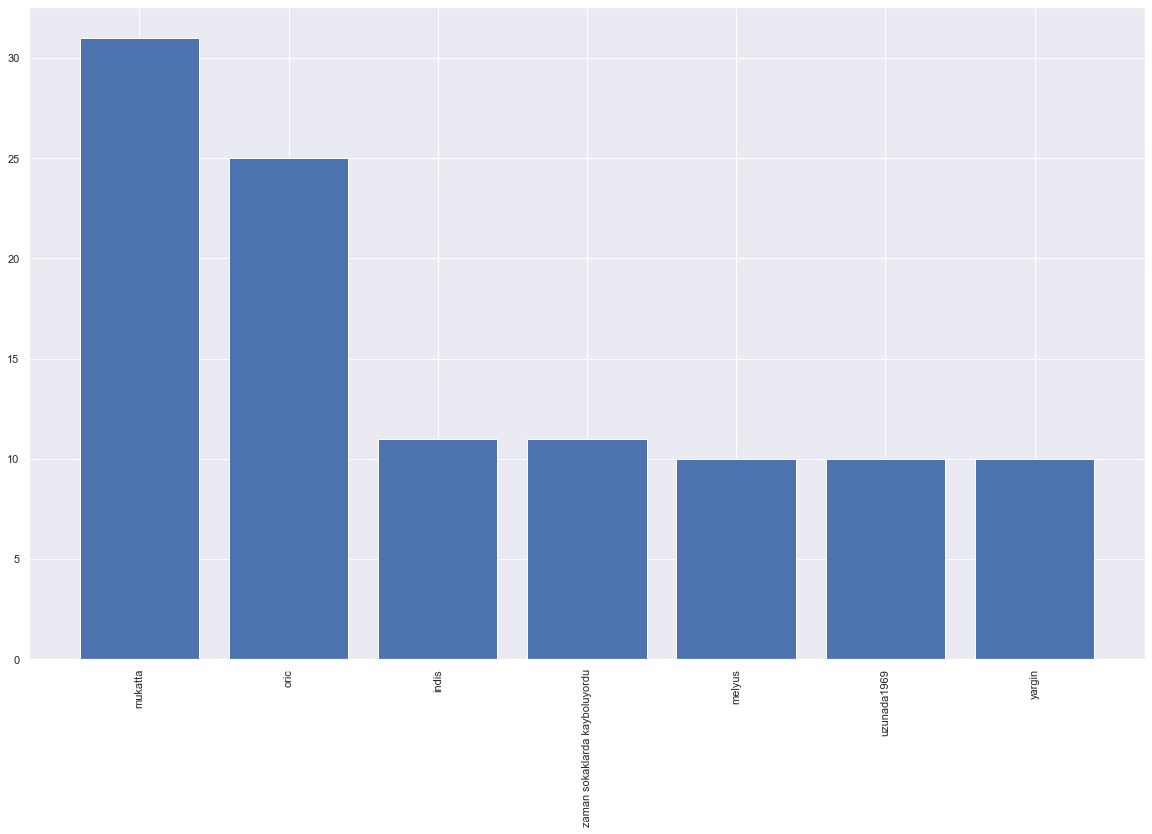

In [34]:
plt.figure(figsize=(20,12))
plt.bar(dfsentiment_pos["Author"], dfsentiment_pos["Count"])
plt.yticks(rotation=360)
plt.xticks(rotation=90)
plt.savefig('psu.jpg',dpi=500)
plt.show()

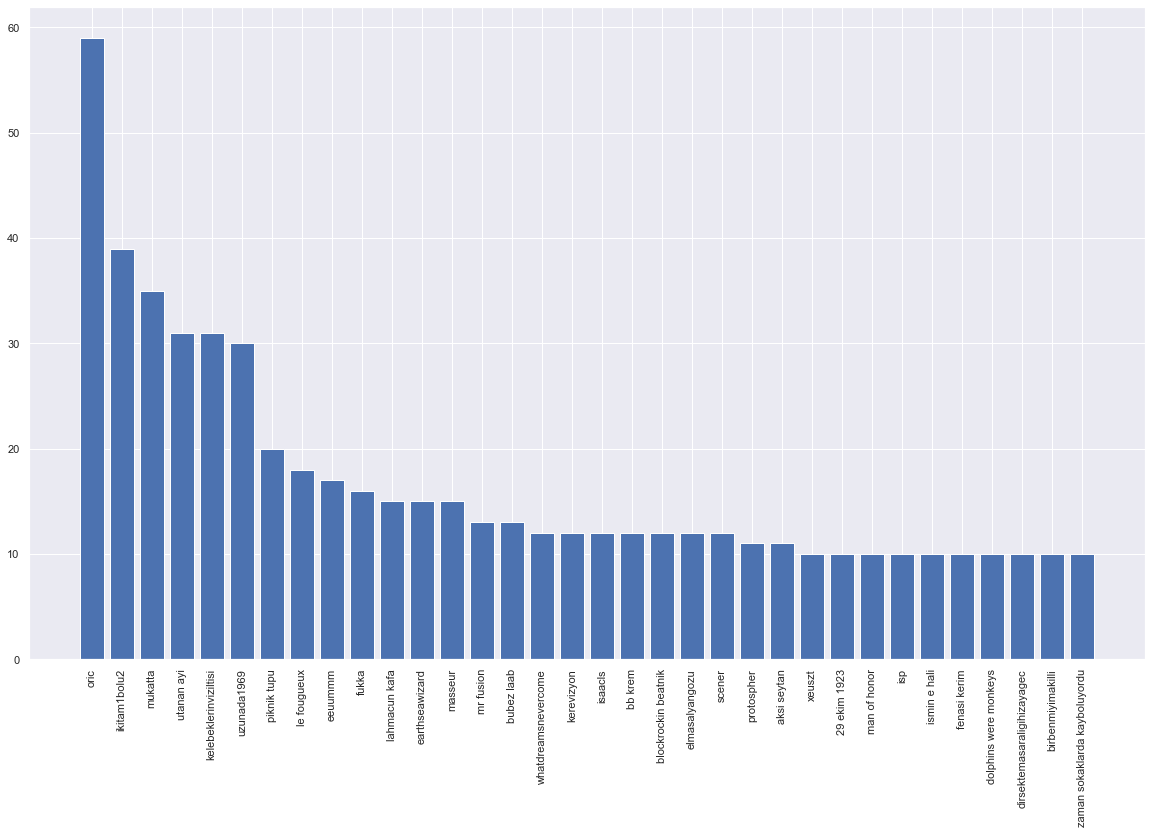

In [35]:
plt.figure(figsize=(20,12))
plt.bar(dfsentiment_neg["Author"], dfsentiment_neg["Count"])
plt.yticks(rotation=360)
plt.xticks(rotation=90)
plt.savefig('negative.pdf',dpi=500)

plt.show()

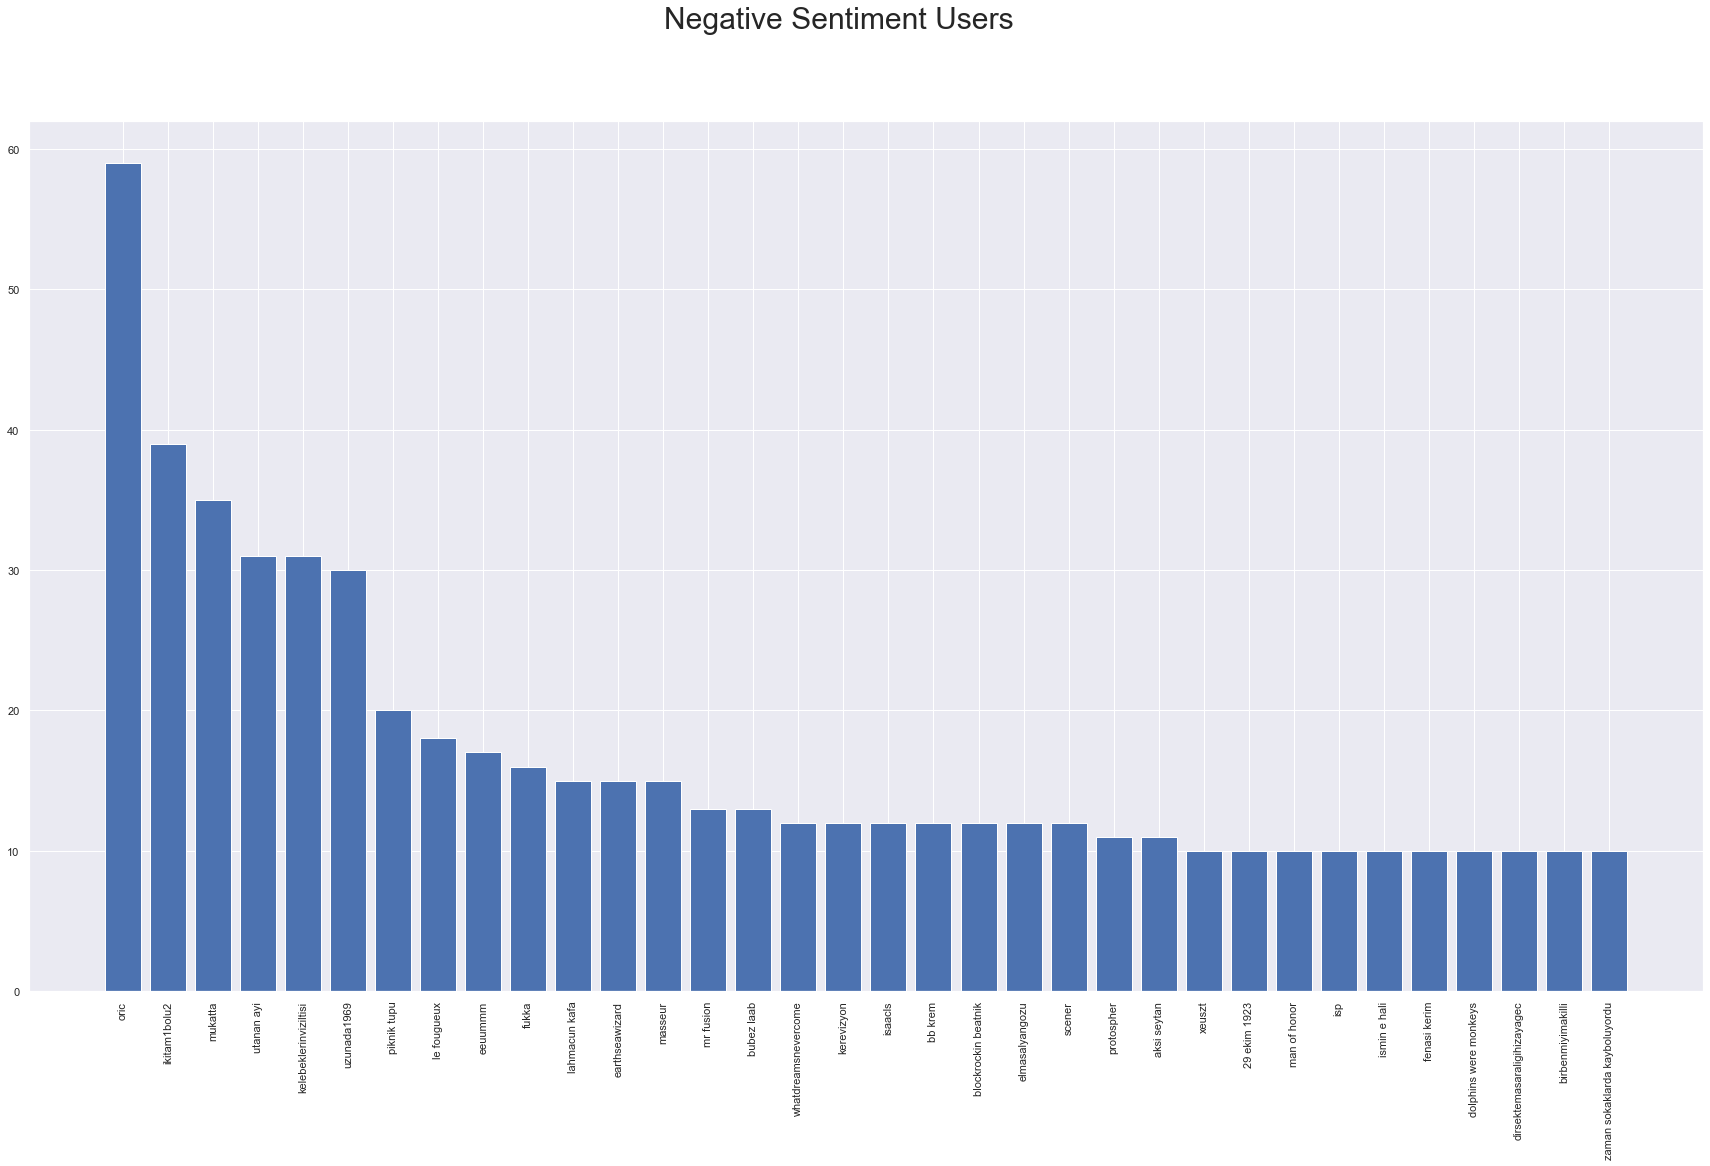

In [36]:
plt.figure(figsize=(30,16))
plt.bar(dfsentiment_neg["Author"], dfsentiment_neg["Count"])
plt.suptitle("Negative Sentiment Users", fontsize = 30)
plt.yticks(rotation=360)
plt.xticks(rotation=90)
plt.savefig('nsu.pdf',dpi=500)


plt.show()

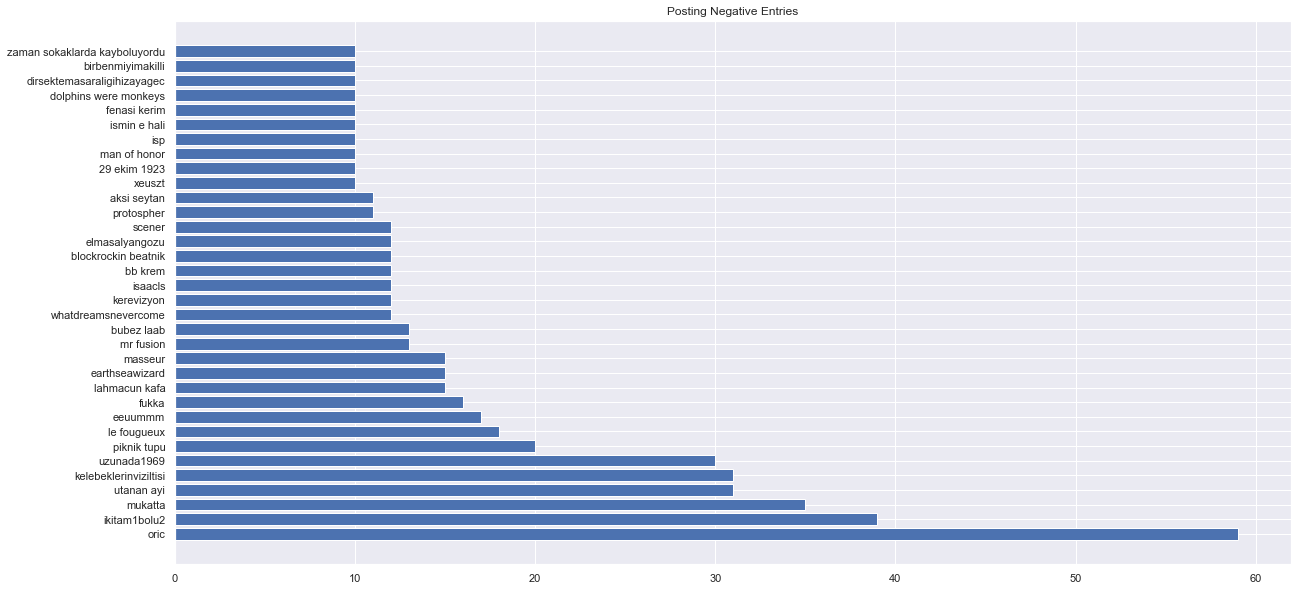

In [109]:
plt.figure(figsize=(20,10))

y_axis = dfsentiment_neg["Author"]
x_axis = dfsentiment_neg["Count"]

plt.barh(y_axis,x_axis)
plt.title("Posting Negative Entries")

plt.savefig('Negative.jpeg',dpi=500)

plt.show()

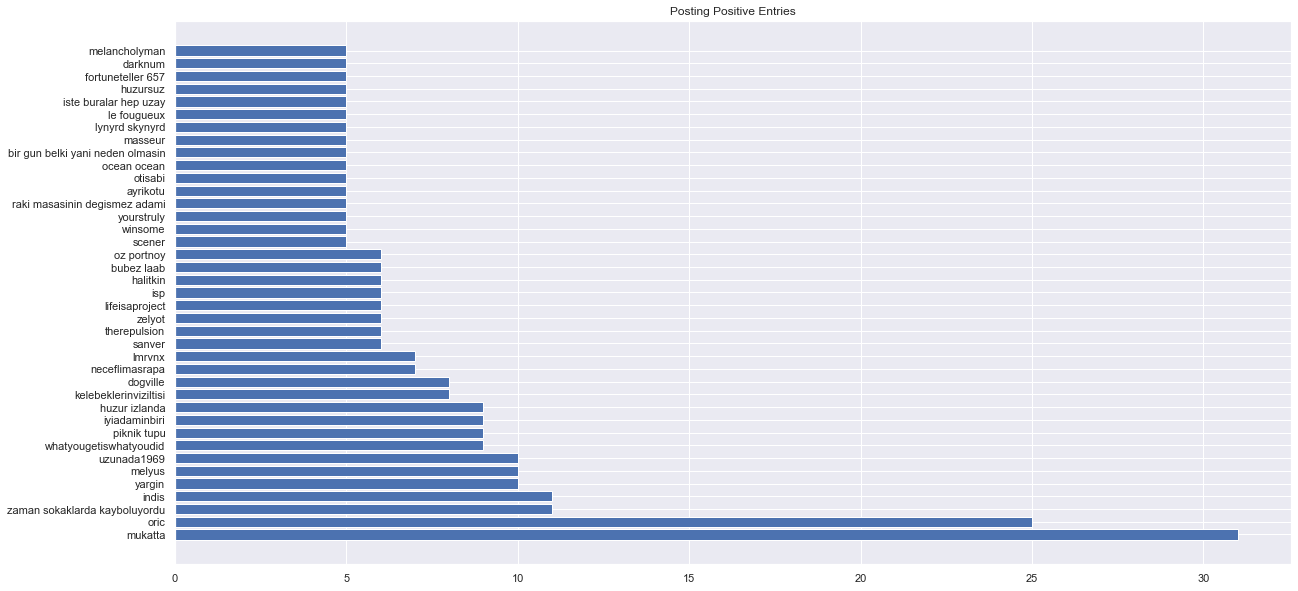

In [110]:
plt.figure(figsize=(20,10))

y_axis = dfsentiment_pos["Author"]
x_axis = dfsentiment_pos["Count"]

plt.barh(y_axis,x_axis)
plt.title("Posting Positive Entries")

plt.savefig('positive.jpeg',dpi=500)

plt.show()